#Nhập các thư viện cần thiết và nhập dữ liệu
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats
from scipy.stats import norm
import matplotlib.dates as mdates


turkey = pd.read_excel('/Users/microwave/Mô hình tài chính quốc tế/a.xlsx')
print(turkey.head(5))

In [2]:
#1.Làm sạch dữ liệu
turkey = turkey.drop('Vol.',axis=1)
turkey['Date'] = pd.to_datetime(turkey['Date'])
turkey['Date'] = turkey['Date'].dt.date
print(turkey.head(5))

         Date   Price    Open    High     Low  Change %
0  2021-01-01  7.4392  7.4392  7.4392  7.4392    0.0018
1  2021-03-01  7.4184  7.4257  7.4420  7.3365   -0.0028
2  2021-04-01  7.4248  7.4403  7.4470  7.3400    0.0009
3  2021-04-01  7.3844  7.4273  7.4314  7.3535   -0.0054
4  2021-05-01  7.3906  7.4293  7.4361  7.3570    0.0008


In [3]:
#2.Thống kê mô tả dữ liệu
descriptive_stats = turkey['Price'].describe()
print(descriptive_stats)
Price = turkey.iloc[:,1]
Date = turkey.iloc[:,0]
Change = turkey.iloc[:,5]
Loss = (turkey['Price'].shift(1) - turkey['Price']) * 1000000
log_ret = np.log(turkey['Price']/turkey['Price'].shift(1))

mean = np.mean(Loss)
std = np.std(Loss)
print(Loss)
print(Price)

count    978.000000
mean      12.547741
std        4.274019
min        6.953200
25%        8.445875
50%       13.334600
75%       17.229325
max       18.718000
Name: Price, dtype: float64
0          NaN
1      20800.0
2      -6400.0
3      40400.0
4      -6200.0
        ...   
973   -40300.0
974    29100.0
975   -20700.0
976    21900.0
977    -2800.0
Name: Price, Length: 978, dtype: float64
0       7.4392
1       7.4184
2       7.4248
3       7.3844
4       7.3906
        ...   
973    18.7180
974    18.6889
975    18.7096
976    18.6877
977    18.6905
Name: Price, Length: 978, dtype: float64


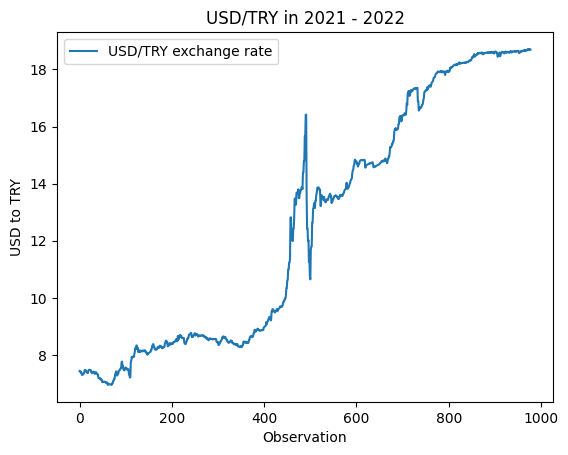

In [4]:
plt.plot(Price, label = 'USD/TRY exchange rate')
plt.xlabel('Observation')
plt.ylabel('USD to TRY')
plt.title('USD/TRY in 2021 - 2022')
plt.legend()
plt.savefig('tigia.png')
plt.show()


2911500.000000002
-1434899.999999999


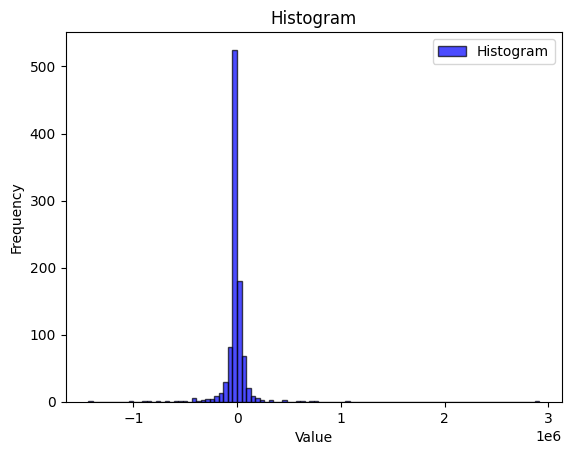

Jarque-Bera statistic: nan
p-value: nan


In [5]:
plt.hist(Loss,bins =100 ,color='blue', edgecolor='black', alpha=0.7, label='Histogram')
print(Loss.max())
print(Loss.min())
# Set labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')

# Show legend
plt.legend()

# Display the plot
plt.show()

from scipy.stats import jarque_bera
jb_statistic, jb_p_value = jarque_bera(Loss)
print(f"Jarque-Bera statistic: {jb_statistic}")
print(f"p-value: {jb_p_value}")

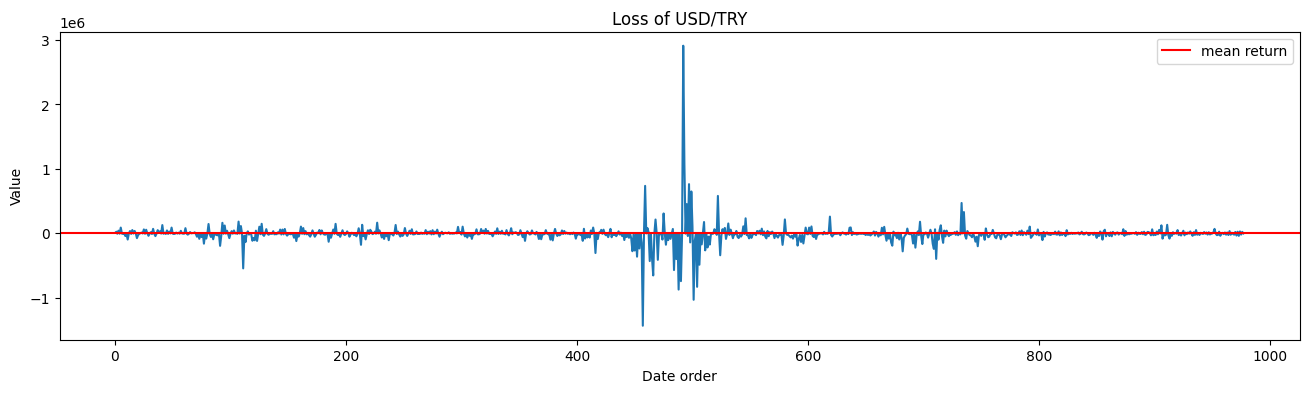

In [6]:
#GARCH
mean = np.nanmean(Loss)
plt.figure(figsize=(16, 4))
plt.plot(Loss)
plt.axhline(y=0, label='mean return', c='red')
plt.xlabel('Date order')
plt.ylabel('Value')
plt.legend()
plt.title('Loss of USD/TRY')
plt.savefig('Loss.png')
plt.show()



In [7]:
#VaR weighted and VaR simulation
#tính profit(loss) bằng lấy gia hôm qua trừ giá hôm nay và plot hist

In [8]:
#ADF
from statsmodels.tsa.stattools import adfuller
print(log_ret)
log_ret_no_na = log_ret[1:]
print(log_ret_no_na)
log_ret_no_na1 = log_ret_no_na * 1000
result = adfuller(log_ret_no_na)

# Extract and print test statistics
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')

    
#split data

0           NaN
1     -0.002800
2      0.000862
3     -0.005456
4      0.000839
         ...   
973    0.002155
974   -0.001556
975    0.001107
976   -0.001171
977    0.000150
Name: Price, Length: 978, dtype: float64
1     -0.002800
2      0.000862
3     -0.005456
4      0.000839
5     -0.012074
         ...   
973    0.002155
974   -0.001556
975    0.001107
976   -0.001171
977    0.000150
Name: Price, Length: 977, dtype: float64
ADF Statistic: -11.141230238701992
p-value: 3.1046377599091206e-20
Critical Values:
   1%: -3.437137538234527
   5%: -2.8645366106945414
   10%: -2.568365556798649


/Users/microwave/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


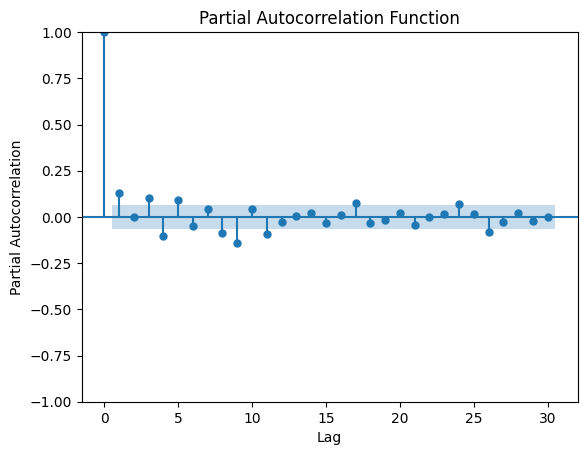

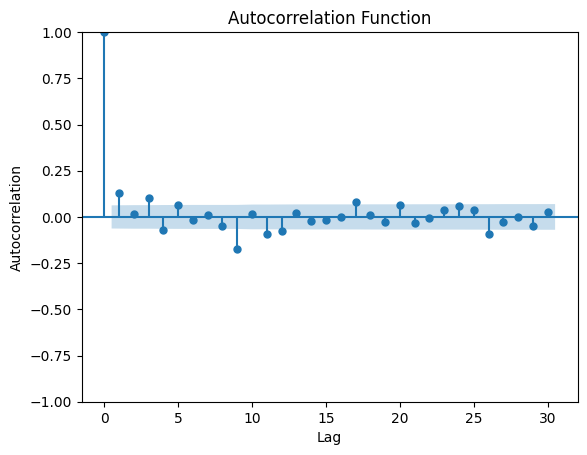

In [9]:
#ACF,PACF
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
series = pd.Series(log_ret_no_na)

# Plot PACF
plot_pacf(log_ret_no_na)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function')
plt.savefig('pacf.png')
plt.show()

# Plot ACF
plot_acf(series)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function')
plt.savefig('acf.png')
plt.show()


In [10]:
from arch import arch_model
#ARCH
model = arch_model(log_ret_no_na1,mean='AR',lags=1,vol='ARCH', p=1, q=0,dist = 'normal')
arch1 = model.fit()
print(arch1.summary())
#GARCH
model = arch_model(log_ret_no_na1,mean='AR',lags=1, vol='GARCH', p=1, q=1,dist = 'normal')
garch1 = model.fit()
print(garch1.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1210681.6589381853
Iteration:      2,   Func. Count:     14,   Neg. LLF: 3810.0304863022307
Iteration:      3,   Func. Count:     20,   Neg. LLF: 3693.1276449654597
Iteration:      4,   Func. Count:     26,   Neg. LLF: 4668.289243679283
Iteration:      5,   Func. Count:     32,   Neg. LLF: 3535.0914144779363
Iteration:      6,   Func. Count:     37,   Neg. LLF: 3521.490469924906
Iteration:      7,   Func. Count:     42,   Neg. LLF: 3489.2500676283266
Iteration:      8,   Func. Count:     47,   Neg. LLF: 35653.85489220536
Iteration:      9,   Func. Count:     53,   Neg. LLF: 61807.77198335192
Iteration:     10,   Func. Count:     59,   Neg. LLF: 58744.28751600643
Iteration:     11,   Func. Count:     65,   Neg. LLF: 94297.62699400983
Iteration:     12,   Func. Count:     71,   Neg. LLF: 86451.06752861667
Iteration:     13,   Func. Count:     77,   Neg. LLF: 73135.08309765063
Iteration:     14,   Func. Count:     83,   Neg. LLF: 58060

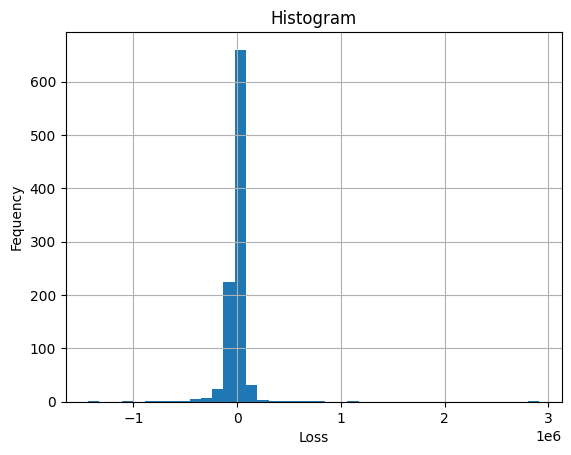

Confidence Level      Value at Risk
------------------  ---------------
90%                           48860
95%                           81840
99%                          270536


In [11]:
from tabulate import tabulate 
plt.hist(Loss,bins=40)
plt.xlabel('Loss')
plt.ylabel('Fequency')
plt.grid(True)
plt.title('Histogram')
plt.savefig('hist.png')
plt.show()

VaR_90= Loss.quantile(0.9)
VaR_95= Loss.quantile(0.95)
VaR_99= Loss.quantile(0.99)

print (tabulate([['90%', VaR_90], ['95%', VaR_95], ["99%", VaR_99]], headers=['Confidence Level', 'Value at Risk']))

Simulated VAR is  232893.74286009948
Simulated VAR is  281703.10123779275


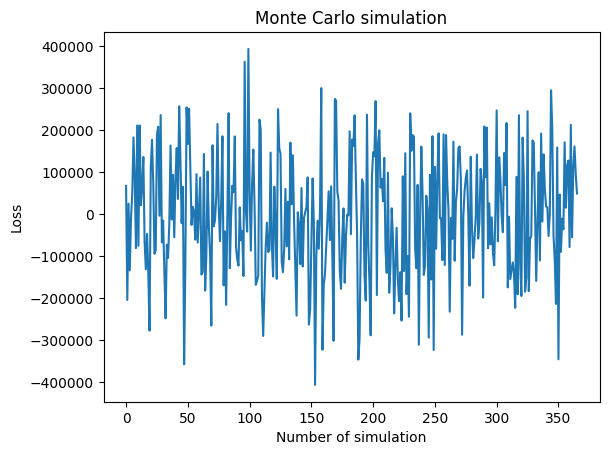

In [12]:
np.random.seed(52)
n_sims = 366
sim_returns = np.random.normal(mean, std, n_sims)
SimVAR95 = np.percentile(sim_returns, 95)
SimVAR99 = np.percentile(sim_returns, 99)
print('Simulated VAR is ', SimVAR95)
print('Simulated VAR is ', SimVAR99)
plt.plot(sim_returns)
plt.xlabel('Number of simulation')
plt.ylabel('Loss')
plt.title('Monte Carlo simulation')
plt.savefig('monte1.png')
plt.show()


In [23]:

simulated_data=pd.DataFrame()
for x in range(n_sims):
    count=0
    daily_volatility=log_ret_no_na.std()
    
    price_series=[]
    
    price=Price.iloc[-1]*(1+np.random.normal(0,daily_volatility))
    price_series.append(price)
    
    for y in range(n_sims):
        if count==365:
            break
        price=price_series[count]*(1+np.random.normal(0,daily_volatility))
        price_series.append(price)
        count+=1
    
    simulated_data[x]=price_series
    print(simulated_data)
    


             0
0    18.794864
1    18.965726
2    18.892526
3    18.931958
4    19.251990
..         ...
361  18.565732
362  18.704154
363  18.868931
364  18.820666
365  18.955218

[366 rows x 1 columns]
             0          1
0    18.794864  18.553497
1    18.965726  18.745363
2    18.892526  18.537305
3    18.931958  18.064062
4    19.251990  17.996191
..         ...        ...
361  18.565732  12.277380
362  18.704154  12.354194
363  18.868931  12.021985
364  18.820666  12.047500
365  18.955218  11.970977

[366 rows x 2 columns]
             0          1          2
0    18.794864  18.553497  18.569735
1    18.965726  18.745363  18.313407
2    18.892526  18.537305  18.125190
3    18.931958  18.064062  18.188077
4    19.251990  17.996191  17.962583
..         ...        ...        ...
361  18.565732  12.277380  14.778951
362  18.704154  12.354194  14.771012
363  18.868931  12.021985  14.992404
364  18.820666  12.047500  14.731165
365  18.955218  11.970977  14.617758

[366 rows x 3 c

            0          1          2          3          4          5   \
0    18.794864  18.553497  18.569735  18.937623  18.650111  18.403784   
1    18.965726  18.745363  18.313407  18.894276  18.307492  18.041476   
2    18.892526  18.537305  18.125190  18.865011  18.437712  18.275543   
3    18.931958  18.064062  18.188077  19.223504  18.526884  18.312909   
4    19.251990  17.996191  17.962583  18.841069  18.275237  18.202168   
..         ...        ...        ...        ...        ...        ...   
361  18.565732  12.277380  14.778951  17.513868  20.057968  12.784362   
362  18.704154  12.354194  14.771012  17.623803  19.904778  12.761951   
363  18.868931  12.021985  14.992404  17.831119  20.087101  12.860782   
364  18.820666  12.047500  14.731165  18.037379  20.580402  12.790911   
365  18.955218  11.970977  14.617758  17.935539  20.649820  12.823812   

            6          7          8          9   ...         48         49  \
0    18.923818  18.178388  18.759091  18.5568

            0          1          2          3          4          5   \
0    18.794864  18.553497  18.569735  18.937623  18.650111  18.403784   
1    18.965726  18.745363  18.313407  18.894276  18.307492  18.041476   
2    18.892526  18.537305  18.125190  18.865011  18.437712  18.275543   
3    18.931958  18.064062  18.188077  19.223504  18.526884  18.312909   
4    19.251990  17.996191  17.962583  18.841069  18.275237  18.202168   
..         ...        ...        ...        ...        ...        ...   
361  18.565732  12.277380  14.778951  17.513868  20.057968  12.784362   
362  18.704154  12.354194  14.771012  17.623803  19.904778  12.761951   
363  18.868931  12.021985  14.992404  17.831119  20.087101  12.860782   
364  18.820666  12.047500  14.731165  18.037379  20.580402  12.790911   
365  18.955218  11.970977  14.617758  17.935539  20.649820  12.823812   

            6          7          8          9   ...         84         85  \
0    18.923818  18.178388  18.759091  18.5568

/var/folders/nk/6_ymhlt94l97ghl62d13wtym0000gn/T/ipykernel_88389/2260514346.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  simulated_data[x]=price_series
/var/folders/nk/6_ymhlt94l97ghl62d13wtym0000gn/T/ipykernel_88389/2260514346.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  simulated_data[x]=price_series
/var/folders/nk/6_ymhlt94l97ghl62d13wtym0000gn/T/ipykernel_88389/2260514346.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

           0          1          2          3          4          5    \
0    18.794864  18.553497  18.569735  18.937623  18.650111  18.403784   
1    18.965726  18.745363  18.313407  18.894276  18.307492  18.041476   
2    18.892526  18.537305  18.125190  18.865011  18.437712  18.275543   
3    18.931958  18.064062  18.188077  19.223504  18.526884  18.312909   
4    19.251990  17.996191  17.962583  18.841069  18.275237  18.202168   
..         ...        ...        ...        ...        ...        ...   
361  18.565732  12.277380  14.778951  17.513868  20.057968  12.784362   
362  18.704154  12.354194  14.771012  17.623803  19.904778  12.761951   
363  18.868931  12.021985  14.992404  17.831119  20.087101  12.860782   
364  18.820666  12.047500  14.731165  18.037379  20.580402  12.790911   
365  18.955218  11.970977  14.617758  17.935539  20.649820  12.823812   

           6          7          8          9    ...        126        127  \
0    18.923818  18.178388  18.759091  18.5568

/var/folders/nk/6_ymhlt94l97ghl62d13wtym0000gn/T/ipykernel_88389/2260514346.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  simulated_data[x]=price_series
/var/folders/nk/6_ymhlt94l97ghl62d13wtym0000gn/T/ipykernel_88389/2260514346.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  simulated_data[x]=price_series
/var/folders/nk/6_ymhlt94l97ghl62d13wtym0000gn/T/ipykernel_88389/2260514346.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

           0          1          2          3          4          5    \
0    18.794864  18.553497  18.569735  18.937623  18.650111  18.403784   
1    18.965726  18.745363  18.313407  18.894276  18.307492  18.041476   
2    18.892526  18.537305  18.125190  18.865011  18.437712  18.275543   
3    18.931958  18.064062  18.188077  19.223504  18.526884  18.312909   
4    19.251990  17.996191  17.962583  18.841069  18.275237  18.202168   
..         ...        ...        ...        ...        ...        ...   
361  18.565732  12.277380  14.778951  17.513868  20.057968  12.784362   
362  18.704154  12.354194  14.771012  17.623803  19.904778  12.761951   
363  18.868931  12.021985  14.992404  17.831119  20.087101  12.860782   
364  18.820666  12.047500  14.731165  18.037379  20.580402  12.790911   
365  18.955218  11.970977  14.617758  17.935539  20.649820  12.823812   

           6          7          8          9    ...        166        167  \
0    18.923818  18.178388  18.759091  18.5568

/var/folders/nk/6_ymhlt94l97ghl62d13wtym0000gn/T/ipykernel_88389/2260514346.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  simulated_data[x]=price_series
/var/folders/nk/6_ymhlt94l97ghl62d13wtym0000gn/T/ipykernel_88389/2260514346.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  simulated_data[x]=price_series
/var/folders/nk/6_ymhlt94l97ghl62d13wtym0000gn/T/ipykernel_88389/2260514346.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

           0          1          2          3          4          5    \
0    18.794864  18.553497  18.569735  18.937623  18.650111  18.403784   
1    18.965726  18.745363  18.313407  18.894276  18.307492  18.041476   
2    18.892526  18.537305  18.125190  18.865011  18.437712  18.275543   
3    18.931958  18.064062  18.188077  19.223504  18.526884  18.312909   
4    19.251990  17.996191  17.962583  18.841069  18.275237  18.202168   
..         ...        ...        ...        ...        ...        ...   
361  18.565732  12.277380  14.778951  17.513868  20.057968  12.784362   
362  18.704154  12.354194  14.771012  17.623803  19.904778  12.761951   
363  18.868931  12.021985  14.992404  17.831119  20.087101  12.860782   
364  18.820666  12.047500  14.731165  18.037379  20.580402  12.790911   
365  18.955218  11.970977  14.617758  17.935539  20.649820  12.823812   

           6          7          8          9    ...        204        205  \
0    18.923818  18.178388  18.759091  18.5568

/var/folders/nk/6_ymhlt94l97ghl62d13wtym0000gn/T/ipykernel_88389/2260514346.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  simulated_data[x]=price_series
/var/folders/nk/6_ymhlt94l97ghl62d13wtym0000gn/T/ipykernel_88389/2260514346.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  simulated_data[x]=price_series
/var/folders/nk/6_ymhlt94l97ghl62d13wtym0000gn/T/ipykernel_88389/2260514346.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

           0          1          2          3          4          5    \
0    18.794864  18.553497  18.569735  18.937623  18.650111  18.403784   
1    18.965726  18.745363  18.313407  18.894276  18.307492  18.041476   
2    18.892526  18.537305  18.125190  18.865011  18.437712  18.275543   
3    18.931958  18.064062  18.188077  19.223504  18.526884  18.312909   
4    19.251990  17.996191  17.962583  18.841069  18.275237  18.202168   
..         ...        ...        ...        ...        ...        ...   
361  18.565732  12.277380  14.778951  17.513868  20.057968  12.784362   
362  18.704154  12.354194  14.771012  17.623803  19.904778  12.761951   
363  18.868931  12.021985  14.992404  17.831119  20.087101  12.860782   
364  18.820666  12.047500  14.731165  18.037379  20.580402  12.790911   
365  18.955218  11.970977  14.617758  17.935539  20.649820  12.823812   

           6          7          8          9    ...        240        241  \
0    18.923818  18.178388  18.759091  18.5568

/var/folders/nk/6_ymhlt94l97ghl62d13wtym0000gn/T/ipykernel_88389/2260514346.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  simulated_data[x]=price_series
/var/folders/nk/6_ymhlt94l97ghl62d13wtym0000gn/T/ipykernel_88389/2260514346.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  simulated_data[x]=price_series
/var/folders/nk/6_ymhlt94l97ghl62d13wtym0000gn/T/ipykernel_88389/2260514346.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

           0          1          2          3          4          5    \
0    18.794864  18.553497  18.569735  18.937623  18.650111  18.403784   
1    18.965726  18.745363  18.313407  18.894276  18.307492  18.041476   
2    18.892526  18.537305  18.125190  18.865011  18.437712  18.275543   
3    18.931958  18.064062  18.188077  19.223504  18.526884  18.312909   
4    19.251990  17.996191  17.962583  18.841069  18.275237  18.202168   
..         ...        ...        ...        ...        ...        ...   
361  18.565732  12.277380  14.778951  17.513868  20.057968  12.784362   
362  18.704154  12.354194  14.771012  17.623803  19.904778  12.761951   
363  18.868931  12.021985  14.992404  17.831119  20.087101  12.860782   
364  18.820666  12.047500  14.731165  18.037379  20.580402  12.790911   
365  18.955218  11.970977  14.617758  17.935539  20.649820  12.823812   

           6          7          8          9    ...        276        277  \
0    18.923818  18.178388  18.759091  18.5568

/var/folders/nk/6_ymhlt94l97ghl62d13wtym0000gn/T/ipykernel_88389/2260514346.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  simulated_data[x]=price_series
/var/folders/nk/6_ymhlt94l97ghl62d13wtym0000gn/T/ipykernel_88389/2260514346.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  simulated_data[x]=price_series
/var/folders/nk/6_ymhlt94l97ghl62d13wtym0000gn/T/ipykernel_88389/2260514346.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

           0          1          2          3          4          5    \
0    18.794864  18.553497  18.569735  18.937623  18.650111  18.403784   
1    18.965726  18.745363  18.313407  18.894276  18.307492  18.041476   
2    18.892526  18.537305  18.125190  18.865011  18.437712  18.275543   
3    18.931958  18.064062  18.188077  19.223504  18.526884  18.312909   
4    19.251990  17.996191  17.962583  18.841069  18.275237  18.202168   
..         ...        ...        ...        ...        ...        ...   
361  18.565732  12.277380  14.778951  17.513868  20.057968  12.784362   
362  18.704154  12.354194  14.771012  17.623803  19.904778  12.761951   
363  18.868931  12.021985  14.992404  17.831119  20.087101  12.860782   
364  18.820666  12.047500  14.731165  18.037379  20.580402  12.790911   
365  18.955218  11.970977  14.617758  17.935539  20.649820  12.823812   

           6          7          8          9    ...        312        313  \
0    18.923818  18.178388  18.759091  18.5568

           0          1          2          3          4          5    \
0    18.794864  18.553497  18.569735  18.937623  18.650111  18.403784   
1    18.965726  18.745363  18.313407  18.894276  18.307492  18.041476   
2    18.892526  18.537305  18.125190  18.865011  18.437712  18.275543   
3    18.931958  18.064062  18.188077  19.223504  18.526884  18.312909   
4    19.251990  17.996191  17.962583  18.841069  18.275237  18.202168   
..         ...        ...        ...        ...        ...        ...   
361  18.565732  12.277380  14.778951  17.513868  20.057968  12.784362   
362  18.704154  12.354194  14.771012  17.623803  19.904778  12.761951   
363  18.868931  12.021985  14.992404  17.831119  20.087101  12.860782   
364  18.820666  12.047500  14.731165  18.037379  20.580402  12.790911   
365  18.955218  11.970977  14.617758  17.935539  20.649820  12.823812   

           6          7          8          9    ...        348        349  \
0    18.923818  18.178388  18.759091  18.5568

/var/folders/nk/6_ymhlt94l97ghl62d13wtym0000gn/T/ipykernel_88389/2260514346.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  simulated_data[x]=price_series
/var/folders/nk/6_ymhlt94l97ghl62d13wtym0000gn/T/ipykernel_88389/2260514346.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  simulated_data[x]=price_series
/var/folders/nk/6_ymhlt94l97ghl62d13wtym0000gn/T/ipykernel_88389/2260514346.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

Simulated VAR is  23.689977801745435
Simulated VAR is  26.74752953622788


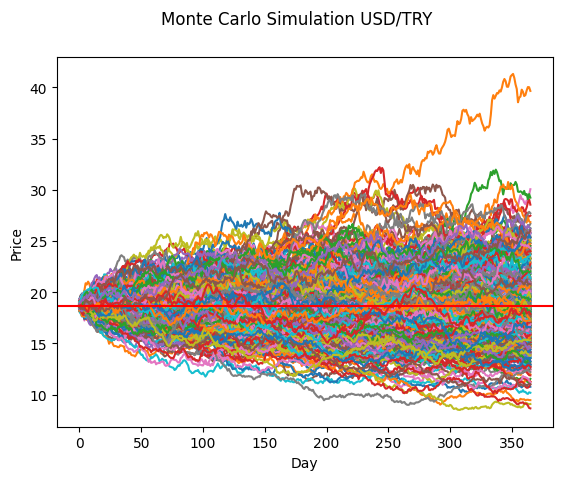

In [24]:
fig=plt.figure()
fig.suptitle('Monte Carlo Simulation USD/TRY')
plt.plot(simulated_data)
plt.axhline(y=Price.iloc[-1],color='r',linestyle='-')
plt.xlabel('Day')
plt.ylabel('Price')
plt.savefig('monte.png')


SimVAR95 = np.percentile(simulated_data, 95)
SimVAR99 = np.percentile(simulated_data, 99)
print('Simulated VAR is ', SimVAR95)
print('Simulated VAR is ', SimVAR99)

In [25]:
simulated_volatality=pd.DataFrame(columns=['simulated_volatality','simulated_var'])

In [26]:
for x in range(n_sims):
    simulated_volatality.loc[x,'simulated_volatality']=simulated_data.iloc[:,x].pct_change().std()
    simulated_volatality.loc[x,'simulated_var']=1000000*simulated_volatality.loc[x,'simulated_volatality']*2.34

In [27]:
simulated_volatality.head()

,simulated_volatality,simulated_var
0,0.011841,27707.690487
1,0.01191,27869.595985
2,0.011467,26832.514813
3,0.012043,28180.834807
4,0.011283,26402.391282


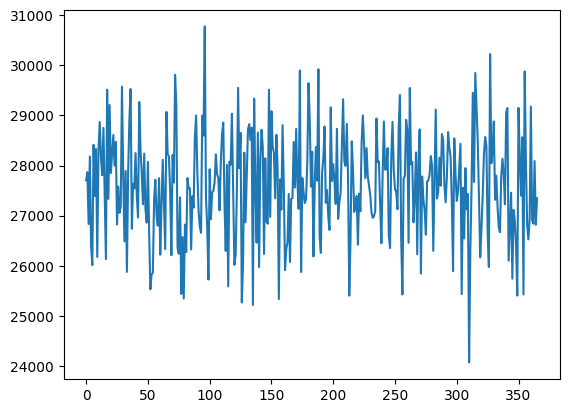

In [28]:
plt.plot(simulated_volatality['simulated_var']);

In [413]:
mean_simulated_var=np.mean(simulated_volatality['simulated_var'])
stand_dev_simulated_var=np.std(simulated_volatality['simulated_var'])
print(f'Simulated average daily VaR is {mean_simulated_var} with standard deviation of {stand_dev_simulated_var}')

Simulated average daily VaR is 19351.397762882178 with standard deviation of 724.7666085288612


In [425]:
Var = np.zeros(n_sims)
x = np.zeros(n_sims)
z = np.zeros(n_sims)

for a in range(n_sims):
    x[a] = np.random.uniform(0,1)
    z[a] = stats.norm.ppf(x[a], 0, 1)
    Var[a] = daily_volatility * z[a]

b = np.percentile(Var, 95)
print(b)

256859.75044290867
